# Day 08. Exercise 02
# Multiclass classification. One-hot encoding. Random forest

## 0. Imports

In [52]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score 
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier

## 1. Preprocessing

1. Read the file [`checker-submits.csv`](https://drive.google.com/file/d/14voc4fNJZiLEFaZyd8nEG-lQt5JjatYw/view?usp=sharing).
2. Create a dataframe `df` with the columns: `uid`, `labname`, `numTrials`, `hour`, `dayofweek` where `hour` is extracted from the `timestamp` as well as the `dayofweek` (`0` is Monday, `6` is Sunday). We will try to predict the day of the week having data about which user made a commit for which lab at which hour and which try it was.
3. Using `OneHotEncoder()` transform your categorical features, delete from the dataframe the initial columns.
4. Use `StandardScaler()` and scale your continuous features.
5. Save the dataframe as `dayofweek.csv`.
6. Before trying out different algorithms, find out the accuracy of the naive algorithms – the one that predicts everything as the most popular class.

In [53]:
df = pd.read_csv('../../datasets/checker_submits.csv')
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['hour'] = df['timestamp'].dt.hour
df['dayofweek'] = df['timestamp'].dt.dayofweek
#weekday_names = [ 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
#df['dayofweek'] = df['weekday_num'].astype(int).map(lambda x: weekday_names[x])
del df['timestamp']
#del df['dayofweek']
df.info()
#df['uid'].unique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1686 entries, 0 to 1685
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   uid        1686 non-null   object
 1   labname    1686 non-null   object
 2   numTrials  1686 non-null   int64 
 3   hour       1686 non-null   int32 
 4   dayofweek  1686 non-null   int32 
dtypes: int32(2), int64(1), object(2)
memory usage: 52.8+ KB


In [54]:
categorical_cols = ['uid', 'labname']
continuous_cols = ['numTrials', 'hour']
target_col = 'dayofweek'

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', preprocessing.OneHotEncoder(sparse_output=False, handle_unknown='ignore'), categorical_cols),
        ('num', StandardScaler(), continuous_cols)
    ],
    remainder='passthrough' 
)
preprocessor

,transformers,"[('cat', ...), ('num', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,categories,'auto'
,drop,None
,sparse_output,False


In [55]:
X = df.drop(columns=target_col)
X_processed = preprocessor.fit_transform(X)

cat_features = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols)
all_features = list(cat_features) + continuous_cols

df_processed = pd.DataFrame(
    X_processed,
    columns=all_features,
    index=df.index
)
df_processed['dayofweek'] = df['dayofweek']
df_processed

,uid_user_0,uid_user_1,uid_user_10,uid_user_11,uid_user_12,uid_user_13,uid_user_14,uid_user_15,uid_user_16,uid_user_17,...,labname_lab05s,labname_laba04,labname_laba04s,labname_laba05,labname_laba06,labname_laba06s,labname_project1,numTrials,hour,dayofweek
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.788667,-2.562352,4
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.756764,-2.562352,4
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.724861,-2.562352,4
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.692958,-2.562352,4
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.661055,-2.562352,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1681,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.533442,0.945382,3
1682,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.629151,0.945382,3
1683,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.597248,0.945382,3
1684,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.565345,0.945382,3


In [56]:
df_processed.to_csv('../../datasets/dayofweek.csv', index=False)
df = df_processed

In [57]:
y = df_processed['dayofweek']
most_frequent_class = y.mode()[0]
naive_prediction = [most_frequent_class] * len(y)
accuracy = accuracy_score(y, naive_prediction)
accuracy

0.23487544483985764

## 2. Algorithms

### a. Logreg

1. Train logistic regression, for the baseline model use `random_state=21`, `fit_intercept=False`. 
2. Calculate the accuracy.
3. Write a function that draws the plot (`barh`) taking coefficients of any trained models, names of the features and the number of `top-n` most important features to display.
4. Draw a plot (`barh`) for the baseline model with top-10 most important features (absolute value) for the trained model.
5. Remember that it is a multiclass classification and `coef_` returns a matrix, to calculate importance for a feature you need to sum all the individual feature importances for all the target values.

In [58]:
x =  df.drop('dayofweek', axis=1)
#print(x)
logreg = LogisticRegression(random_state=21, fit_intercept=False)
logreg.fit(x,y)
df['predict_logreg'] = logreg.predict(x)
accuracy = accuracy_score(df['dayofweek'], df['predict_logreg'])
accuracy

0.6405693950177936

In [59]:
def plot_feature_importance(model, feature_names, top_n=10):
    try:
        if hasattr(model, 'estimators_'):  
            if hasattr(model.estimators_[0], 'coef_'):
                importances = np.sum([np.abs(est.coef_) for est in model.estimators_], axis=0)
                importances = importances.reshape(-1)  
            elif hasattr(model.estimators_[0], 'feature_importances_'):
                importances = np.sum([est.feature_importances_ for est in model.estimators_], axis=0)
        elif hasattr(model, 'feature_importances_'):
            importances = model.feature_importances_
        elif hasattr(model, 'coef_'):
            importances = np.sum(np.abs(model.coef_), axis=0)
        
        importance_df = pd.DataFrame({
            'feature': feature_names,
            'importance': importances
        }).sort_values('importance').tail(top_n)
        
        
        plt.figure(figsize=(10, 6))
        plt.barh(importance_df['feature'], importance_df['importance'], color='#708090')
        plt.title(f'Top {top_n} Feature Importances')
        plt.xlabel('Importance Score')
        plt.grid(axis='x', alpha=0.3)
        plt.tight_layout()
        plt.show()
    except Exception as e:
        print(f"Error: {e}")

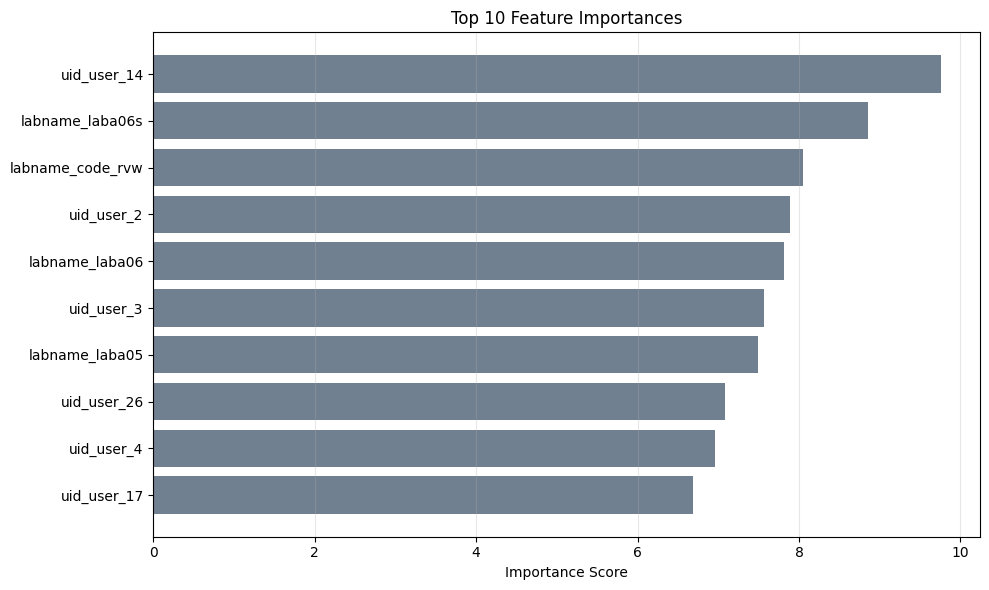

In [60]:
plot_feature_importance(logreg, x.columns, top_n=10)

### b. SVC

1. Train a `SVC` model, for the baseline model use parameters `kernel='linear'`, `probability=True`, `random_state=21`. 
2. Try different kernels, calculate the accuracies.
3. Draw a plot (`barh`) for the baseline model with top-10 most important features (absolute value) for the trained model for the linear kernel *

*By default SVC uses “one vs one” strategy of the classification, thus in `coef_` it returns a matrix. To calculate importance for a feature you need to use [OneVsRestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.multiclass.OneVsRestClassifier.html) over the SVC and sum all the individual feature importances for all the target values.

In [61]:
svc = SVC(random_state=21, kernel='linear', probability=True)
svc.fit(x,y)
linear = svc.predict(x)
accuracy = accuracy_score(df['dayofweek'], linear)
accuracy

0.702846975088968

In [62]:
svc = SVC(random_state=21, kernel='sigmoid', probability=True)
svc.fit(x,y)
sigmoid = svc.predict(x)
accuracy = accuracy_score(df['dayofweek'], sigmoid)
accuracy

0.3997627520759193

In [63]:
svc = SVC(random_state=21, kernel='poly', probability=True)
svc.fit(x,y)
poly = svc.predict(x)
accuracy = accuracy_score(df['dayofweek'], poly)
accuracy

0.8594306049822064

In [64]:
svc = SVC(random_state=21, probability=True)
svc.fit(x,y)
rbf = svc.predict(x)
accuracy = accuracy_score(df['dayofweek'], rbf)
accuracy

0.8558718861209964

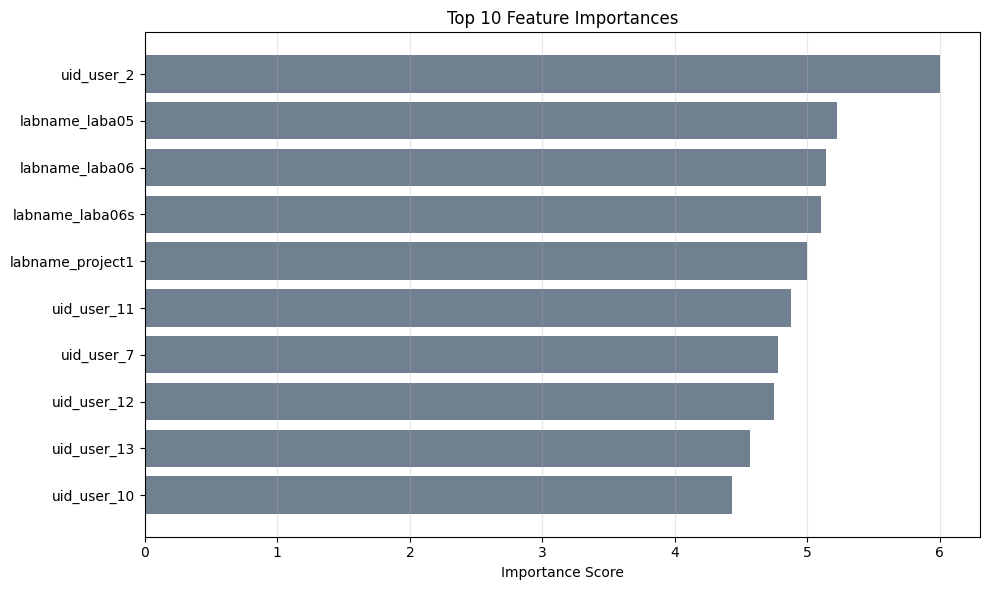

In [65]:
ovr_svc = OneVsRestClassifier(SVC(kernel='linear', random_state=21, probability=True))
ovr_svc.fit(x, y)
plot_feature_importance(ovr_svc, x.columns.tolist())

### c. Decision tree

1. Train a `DecisionTreeClassifier` using for the baseline model `max_depth=4`, `random_state=21`. 
2. Try different values of `max_depth`, calculate the accuracies.
3. Draw a plot (`barh`) for the baseline model with top-10 most important features (absolute value) for the trained model using the written function.

In [66]:
tree = DecisionTreeClassifier(max_depth=4, random_state=21)
tree.fit(x,y)
tr = tree.predict(x)
accuracy = accuracy_score(y, tr)
accuracy

0.5516014234875445

In [67]:
tree = DecisionTreeClassifier(max_depth=7, random_state=21)
tree.fit(x,y)
tr = tree.predict(x)
accuracy = accuracy_score(y, tr)
accuracy

0.7064056939501779

In [68]:
tree = DecisionTreeClassifier(max_depth=11, random_state=21)
tree.fit(x,y)
tr = tree.predict(x)
accuracy = accuracy_score(y, tr)
accuracy

0.8499406880189798

In [69]:
tree = DecisionTreeClassifier(max_depth=28, random_state=21)
tree.fit(x,y)
tr = tree.predict(x)
accuracy = accuracy_score(y, tr)
accuracy

1.0

In [70]:
tree = DecisionTreeClassifier(max_depth=27, random_state=21)
tree.fit(x,y)
tr = tree.predict(x)
accuracy = accuracy_score(y, tr)
accuracy

0.9988137603795967

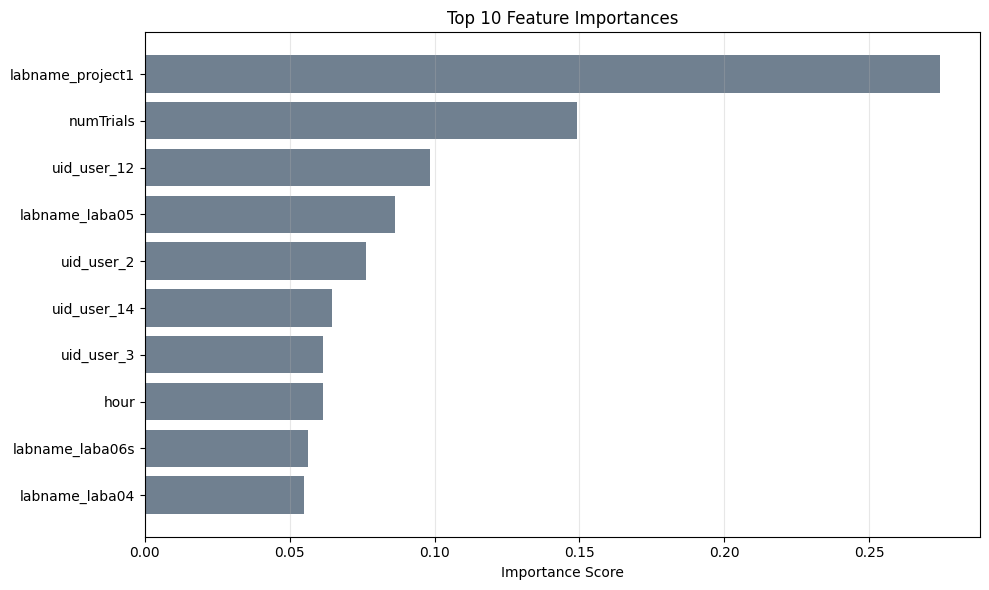

In [71]:
tree = DecisionTreeClassifier(max_depth=4, random_state=21)
tree.fit(x,y)
plot_feature_importance(tree, x.columns)

### d. Random forest

In real life forest is a set of trees. The same thing is with machine learning. Random forest is a set of individual decision trees (check the documentation for more details).

1. Train a `RandomForestClassifier` using for the baseline model parameters `n_estimators=100`, `max_depth = 25`, `random_state=21`. 
2. Try different values of `max_depth` and `n_estimators`, calculate the accuracies.
3. Draw a plot (`barh`) for the baseline model with top-10 most important features (absolute value) for the trained model using the written function.

In [72]:
randfor = RandomForestClassifier(n_estimators=100, max_depth=25, random_state=21)
randfor.fit(x,y)
randforest = randfor.predict(x)
accuracy = accuracy_score(y, randforest)
accuracy

0.9994068801897983

In [73]:
randfor = RandomForestClassifier(n_estimators=50, max_depth=25, random_state=21)
randfor.fit(x,y)
randforest = randfor.predict(x)
accuracy = accuracy_score(y, randforest)
accuracy

0.9994068801897983

In [74]:
randfor = RandomForestClassifier(n_estimators=10, max_depth=12, random_state=21)
randfor.fit(x,y)
randforest = randfor.predict(x)
accuracy = accuracy_score(y, randforest)
accuracy

0.9033214709371293

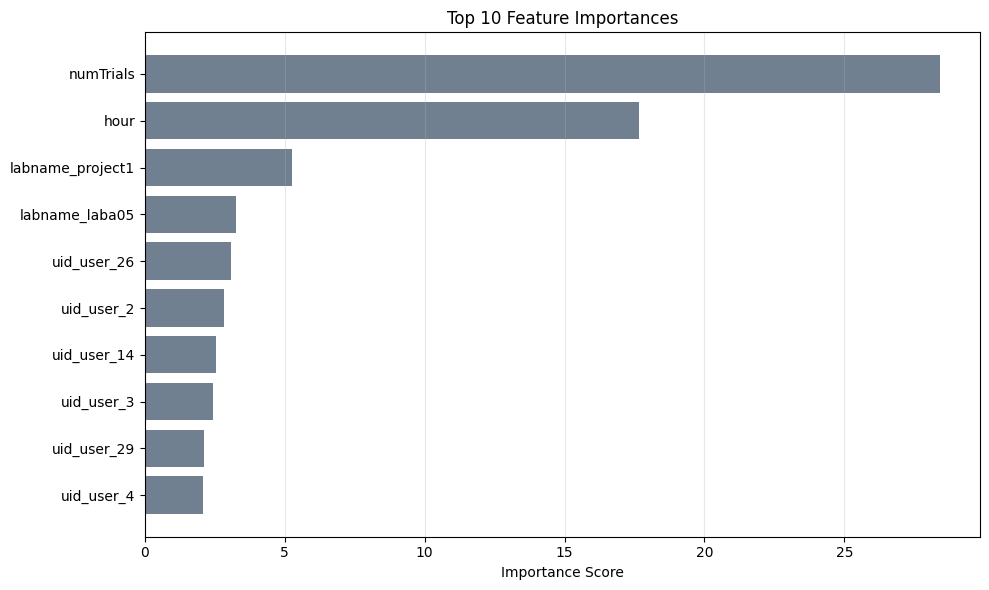

In [75]:
randfor = RandomForestClassifier(n_estimators=100, max_depth=25, random_state=21)
randfor.fit(x,y)
plot_feature_importance(randfor, x.columns)